In [1]:
import numpy as np
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime as dt
import time
import matplotlib.pyplot as plt
# WORK_PATH = "/Users/fangzeqiang/Desktop/SDSV-T2/CASA0006-DSSS/Assessment/"

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# supported by StackOverflow https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error


In [2]:
# georgia_data = pd.read_csv("GData_utm.csv")
# read the data
# This reading operation might take 25s because the size of it is 25MB 
t0 = time.time()
url = "london.xlsx"
print('Loading data from ', url)
georgia_data = pd.read_excel(url)
print('time taken', time.time()-t0, 'second')
# df.info()
georgia_data.head()

Loading data from  london.xlsx
time taken 0.05973029136657715 second


,code,borough,Car,Public Transport,Bicycle/On Foot,Total,Usually resident population,PTAL,High qualification percentage,Annual household income,Older worker
0,E09000001,City of London,165,1048,2340,3790,7375,7,38,44337,3628
1,E09000002,Barking and Dagenham,25542,21594,5218,60234,185911,2,21,27477,9254
2,E09000003,Barnet,54969,55335,11167,130359,356386,2,40,35680,22709
3,E09000004,Bexley,46845,11266,6684,89775,231997,1,22,33624,18107
4,E09000005,Brent,35428,56847,12668,113458,311215,2,33,30679,17614


Loading data from  london_boroughs.json
time taken 0.31273865699768066 second


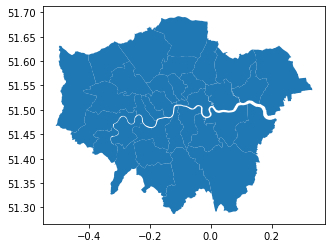

In [3]:
# This process may take 3 seconds,
t1 = time.time()
url_geo = "london_boroughs.json"
print('Loading data from ', url_geo)
georgia_shp = gpd.read_file(url_geo)
print('time taken', time.time()-t1, 'second')

georgia_shp.plot()
plt.savefig('figpath.png', dpi=800, bbox_inches='tight')

In [4]:
georgia_shp.head()

,id,name,code,area_hectares,inner_statistical,geometry
0,1,Kingston upon Thames,E09000021,3726.117,False,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,2,Croydon,E09000008,8649.441,False,"MULTIPOLYGON (((-0.06402 51.31864, -0.06408 51..."
2,3,Bromley,E09000006,15013.487,False,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,4,Hounslow,E09000018,5658.541,False,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,5,Ealing,E09000009,5554.428,False,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


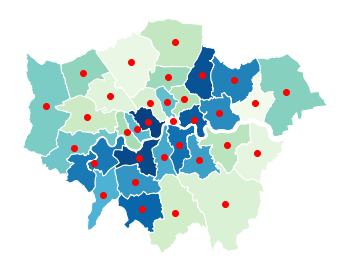

In [5]:
ax = georgia_shp.plot(edgecolor='white',column="code",cmap='GnBu',figsize=(6,6))
georgia_shp.centroid.plot(ax=ax, color='r',marker='o')
ax.set_axis_off()

In [6]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show
%matplotlib inline

In [7]:
gdf = pd.merge(georgia_data,georgia_shp,left_on='code',right_on='code',how='inner')
gdf.head()

,code,borough,Car,Public Transport,Bicycle/On Foot,Total,Usually resident population,PTAL,High qualification percentage,Annual household income,Older worker,id,name,area_hectares,inner_statistical,geometry
0,E09000001,City of London,165,1048,2340,3790,7375,7,38,44337,3628,33,City of London,314.942,True,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51..."
1,E09000002,Barking and Dagenham,25542,21594,5218,60234,185911,2,21,27477,9254,32,Barking and Dagenham,3779.934,False,"MULTIPOLYGON (((0.06971 51.54406, 0.07035 51.5..."
2,E09000003,Barnet,54969,55335,11167,130359,356386,2,40,35680,22709,10,Barnet,8674.837,False,"MULTIPOLYGON (((-0.19990 51.67017, -0.19970 51..."
3,E09000004,Bexley,46845,11266,6684,89775,231997,1,22,33624,18107,15,Bexley,6428.649,False,"MULTIPOLYGON (((0.12021 51.51144, 0.12159 51.5..."
4,E09000005,Brent,35428,56847,12668,113458,311215,2,33,30679,17614,9,Brent,4323.270,False,"MULTIPOLYGON (((-0.19657 51.52765, -0.19685 51..."


In [8]:
wq = lps.weights.Queen.from_dataframe(gdf)# 使用Quuen式邻接矩阵
wq.transform = 'r' # 标准化矩阵
centroids = georgia_shp.geometry.centroid # 计算多边形几何中心

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
y=gdf["Car"]
mi = esda.moran.Moran(y, wq)
print("Moran's I 值为：",mi.I)
print("随机分布假设下Z检验值为：",mi.z_rand)
print("随机分布假设下Z检验的P值为：",mi.p_rand)
print("正态分布假设下Z检验值为：",mi.z_norm)
print("正态分布假设下Z检验的P值为：",mi.p_norm)

Moran's I 值为： 0.4164822147723365
随机分布假设下Z检验值为： 3.7933348100277753
随机分布假设下Z检验的P值为： 0.00014863752541605102
正态分布假设下Z检验值为： 3.8536786104601934
正态分布假设下Z检验的P值为： 0.00011635631060302742


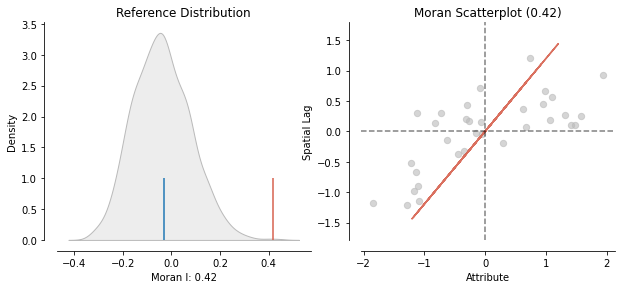

In [10]:
from splot.esda import plot_moran
plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [11]:
import esda  
import numpy as np
import pandas as pd
import libpysal as lps
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
from shapely.geometry import Point
from pylab import figure, scatter, show
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import lisa_cluster
from splot.esda import plot_local_autocorrelation

%matplotlib inline

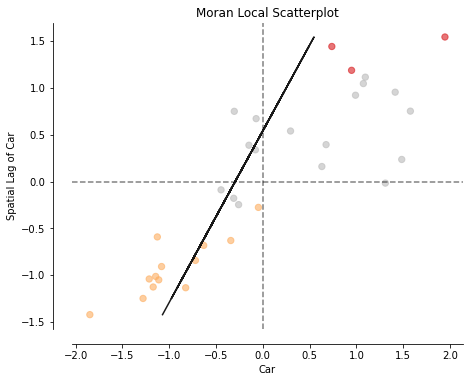

In [12]:
y = gdf['Car'].values
w = lps.weights.distance.Kernel.from_dataframe(gdf, fixed=False, k=15)
w.transform = 'r'
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Car')
ax.set_ylabel('Spatial Lag of Car')
plt.show()

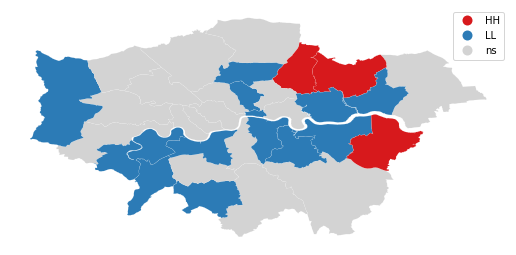

In [13]:
lisa_cluster(moran_loc, georgia_shp, p=0.05, figsize = (9,9))
plt.show()

In [15]:
# 计算莫兰指数 esda.moran.Moran
# from pysal.lib.weights import Queenfrom 
from esda.moran import Moran
w_queen = lps.weights.Queen.from_dataframe(gdf)
name = ['Total', 'Car', 'Public Transport', 'Bicycle/On Foot','Usually resident population', 'PTAL', 'High qualification percentage', 'Annual household income', 'Older worker']
### 构建权重矩阵 queen矩阵
moran = pd.DataFrame(index=name)
for i in name:    
    moran.loc[i,'Moran_I'] = Moran(np.array(gdf[i]),w_queen).I    
    moran.loc[i,'Z_score'] = round(Moran(np.array(gdf[i]),w_queen).z_norm,3)    
    moran.loc[i,'P_value'] = round(Moran(np.array(gdf[i]),w_queen).p_norm,3)
moran

,Moran_I,Z_score,P_value
Total,0.130043,1.388,0.165
Car,0.416482,3.854,0.000
Public Transport,0.120781,1.309,0.191
Bicycle/On Foot,0.072729,0.895,0.371
Usually resident population,0.138368,1.460,0.144
PTAL,0.482798,4.424,0.000
High qualification percentage,0.399587,3.708,0.000
Annual household income,0.202084,2.008,0.045
Older worker,0.186748,1.876,0.061


In [16]:
# 因变量
g_y = georgia_data['Car'].values.reshape((-1,1))

# 自变量
# g_X = georgia_data[['Usually resident population', 'PTAL', 'High qualification percentage', 'Annual household income', 'Older worker']].values
g_X = georgia_data[['PTAL', 'High qualification percentage', 'Annual household income']].values

# 坐标信息Latitude	Longitud
# u = georgia_data['geometry']
# v = georgia_data['Latitude']
#g_coords = list(zip(u,v))
g_coords = list(zip(georgia_shp.centroid.x, georgia_shp.centroid.y))

# z标准化
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)
# g_y = g_y.reshape((-1,1))
# g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if sys.path[0] == '':


In [17]:
# 带宽选择函数
# gwr_selector = Sel_BW(g_coords, g_y, g_X)
# gwr_bw = gwr_selector.search(criterion='AICc')
# print('最佳带宽大小为：',gwr_bw)

# gwr_selector = Sel_BW(g_coords, g_y, g_X,fixed=True,kernel='gaussian')
# gwr_bw = gwr_selector.search(criterion='AICc')
# # gwr_bw = 10
# gwr_results = GWR(g_coords, g_y, g_X,gwr_bw,fixed=True,kernel='gaussian').fit()
# gwr_results.summary()

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
# gwr_bw = 10
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()
gwr_results.summary()

32.0
Model type                                                         Gaussian
Number of observations:                                                  33
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       2332951568.666
Log-likelihood:                                                    -345.044
AIC:                                                                698.088
AICc:                                                               702.311
BIC:                                                           2332951467.268
R2:                                                                   0.739
Adj. R2:                                                              0.712

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- --------

In [18]:
# 回归参数
var_names=['cof_Intercept','cof_PTAL', 'cof_High qualification percentage', 'cof_Annual household income']
gwr_coefficent=pd.DataFrame(gwr_results.params,columns=var_names)

# 回归参数显著性
gwr_flter_t=pd.DataFrame(gwr_results.filter_tvals())

# 将点数据回归结果放到面上展示 
# 主要是由于两个文件中的记录数不同，矢量面中的记录比csv中多几条，因此需要将没有参加gwr的区域去掉
georgia_data_geo=gp.GeoDataFrame(georgia_data,geometry=gp.points_from_xy(georgia_shp.centroid.x, georgia_shp.centroid.y))
georgia_data_geo=georgia_data_geo.join(gwr_coefficent)

# 将回归参数与面数据结合
georgia_shp_geo=gp.sjoin(georgia_shp,georgia_data_geo, how="inner", op='intersects').reset_index()
# georgia_data_geo

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  


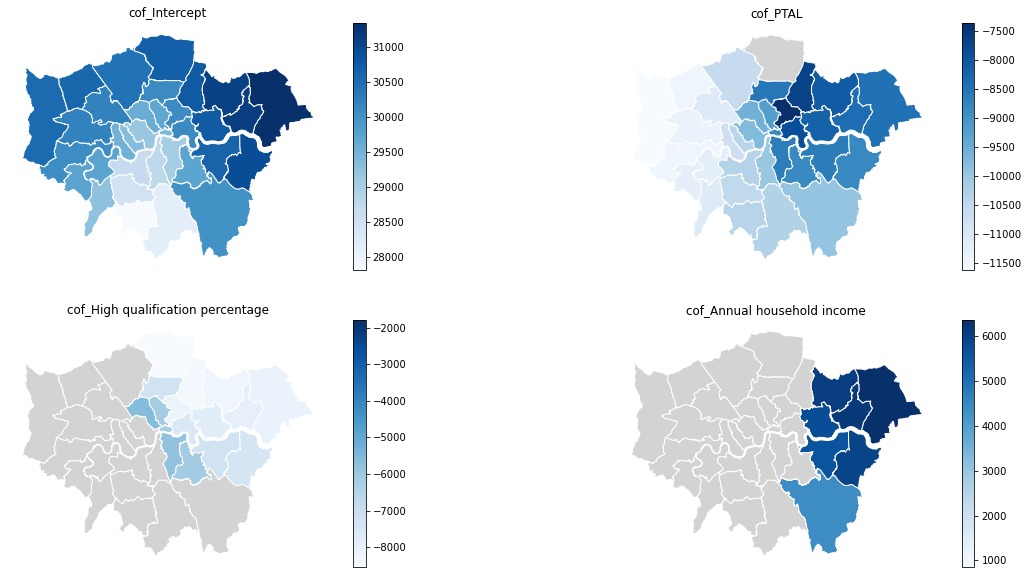

In [19]:
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(20,10))
axes = ax.flatten()

for i in range(0,len(axes)):
    
    ax=axes[i]
    ax.set_title(var_names[i])
    georgia_shp_geo.plot(ax=ax,column=var_names[i],edgecolor='white',cmap='Blues',legend=True)
    
    if (gwr_flter_t[i] == 0).any():
        georgia_shp_geo[gwr_flter_t[i] == 0].plot(color='lightgrey', ax=ax, edgecolor='white') # 灰色部分表示该系数不显著
 
    
    ax.set_axis_off()
    if i+1==5:
        axes[5].axis('off')
        
plt.savefig('figpath.png', dpi=800, bbox_inches='tight')
plt.show()